### Imports

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

import xgboost as xgb

In [4]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.9 MB/s eta 0:00:00


### Load data

In [3]:
%cd /content/drive/MyDrive/python_for_business_and_finance/xgboost_and_shap

df = pd.read_csv('car_prices.csv')
df.head()

/content/drive/MyDrive/python_for_business_and_finance/xgboost_and_shap


,Unnamed: 0,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,1,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,2,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,3,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,4,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,5,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0


### Data cleaning and preparation

In [6]:
# Drop Unnamed: 0 column
df.drop(columns = ["Unnamed: 0"], inplace = True)

In [7]:
# Isolate X and y
X = df.drop(columns = ['Price'])
y = df['Price']

In [9]:
# Split dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
# Create XGBoost matrices
Train = xgb.DMatrix(X_train, label = y_train)
Test = xgb.DMatrix(X_test, label = y_test)

### XGBoost preparation

In [11]:
# Set up parameters
params = {'learning_rate': 0.3,
              'max_depth' : 6,
              'colsample_bytree':1,
              'subsample':1,
              'min_child_weight':1,
              'gamma':0,
              'eval_metric':'rmse',
              'objective':'reg:squarederror'}

In [12]:
# Instantiate and train model
model = xgb.train(params = params,
                  dtrain = Train,
                  num_boost_round = 15,
                  evals = [(Test, "Price")])

[0]	Price-rmse:17653.23722
[1]	Price-rmse:12590.18003
[2]	Price-rmse:9019.16628
[3]	Price-rmse:6550.07349
[4]	Price-rmse:4871.98421
[5]	Price-rmse:3823.27939
[6]	Price-rmse:3146.97106
[7]	Price-rmse:2721.23755
[8]	Price-rmse:2472.52481
[9]	Price-rmse:2360.60302
[10]	Price-rmse:2298.13696
[11]	Price-rmse:2274.40229
[12]	Price-rmse:2266.84632
[13]	Price-rmse:2298.74200
[14]	Price-rmse:2291.35290


### Model evaluation

In [13]:
# Predictions
predictions = model.predict(Test)
predictions[:2]

array([21925.975, 21162.959], dtype=float32)

In [16]:
# Calculate MAE and RMSE
mae = round(mean_absolute_error(y_test, predictions), 0)
rmse = round(mean_squared_error(y_test, predictions)**(1/2), 0)

print(f"MAE: {mae}, RMSE:{rmse}")

MAE: 1609.0, RMSE:2291.0


### SHAP

In [17]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [20]:
# all observations
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values, X_test)

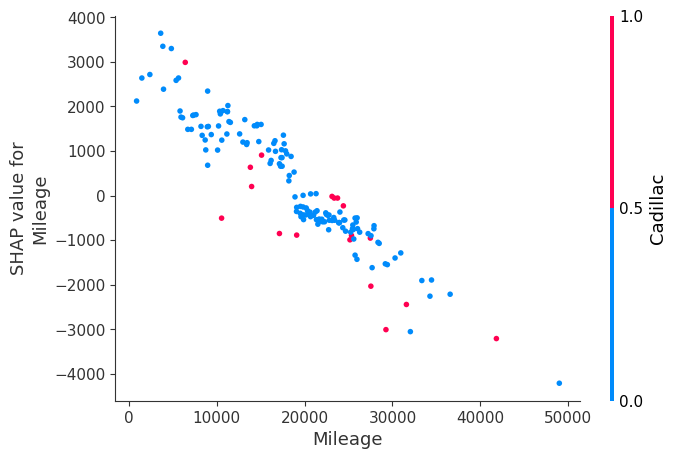

In [21]:
# Dependency plots (for mileage)
shap.dependence_plot('Mileage', shap_values, X_test)

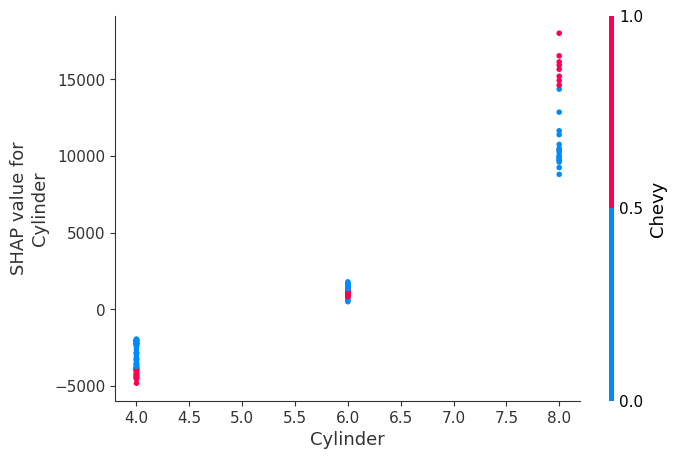

In [22]:
# Dependency plots (for cylinder)
shap.dependence_plot('Cylinder', shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


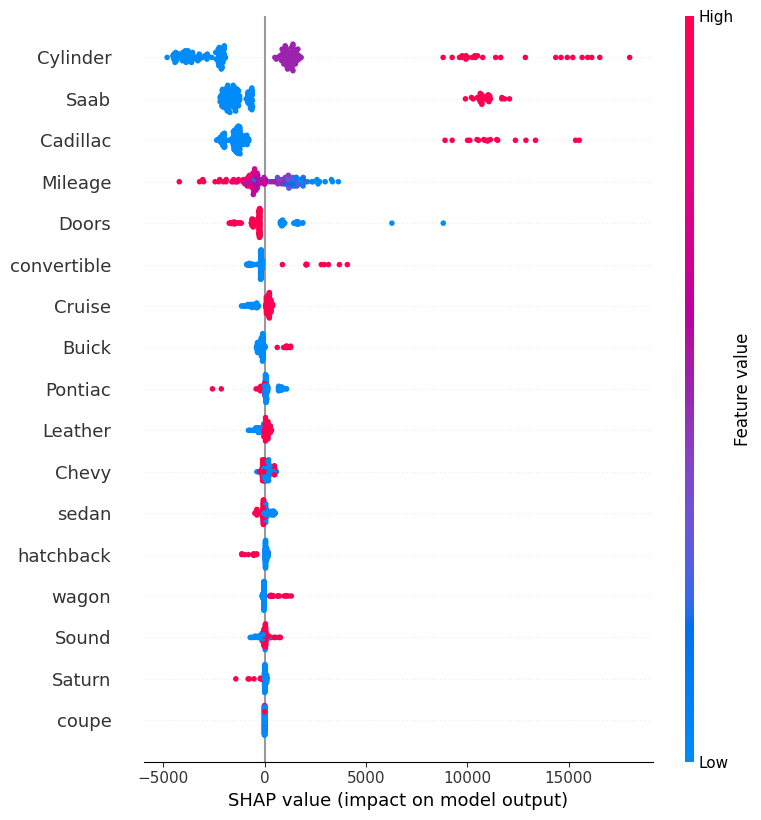

In [23]:
# Global interpretability (summary plot)
shap.summary_plot(shap_values, X_test)